# MNIST Data Set - Basic Approach

### Get the MNIST Data

In [1]:
import tensorflow as tf

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)
# so that the labels are one and coded already for you.

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


** Alternative sources of the data just in case: **

* http://yann.lecun.com/exdb/mnist/
* https://github.com/mrgloom/MNIST-dataset-in-different-formats

In [4]:
"""
So if we take a look at the type of what this is it's basically
this kind of specialized tensor flow
data set than it already has a lot of convenient methods built 
into it later on when we deal with other
data sets we're going to have to basically make our own classes
to create these kind of methods.
But for now we're going to take advantage of these convenience
methods.
"""
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [5]:
mnist.train.images
"""
So if you choose one of those sets such as train and
then hit tab here you can see there's images labels.
There's also a next batch function which is nice basically
feeds in batches number of examples epochs
completed etcetera.
So if we take a look at the images themselves you get the
output of a bunch of arrays.
"""

"\nSo if you choose one of those sets such as train and\nthen hit tab here you can see there's images labels.\nThere's also a next batch function which is nice basically\nfeeds in batches number of examples epochs\ncompleted etcetera.\nSo if we take a look at the images themselves you get the\noutput of a bunch of arrays.\n"

In [6]:
# So then you can actually ask for how many examples 
# there are as we discussed there's 55000 training
mnist.train.num_examples

55000

In [7]:
mnist.test.num_examples

10000

In [8]:
mnist.validation.num_examples

5000

### Visualizing the Data

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
mnist.train.images.shape
# (55000 images by 784 pizels, remmer 28 x 28say this train images and 
# if I check out the shape of this this is 55000 images by 784 pixels

(55000, 784)

In [12]:
# remember that's just 28 times 28. Let's get one of these...
mnist.train.images[5]
# You get flattened out image, and as usual the shpe is as below

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [14]:
mnist.train.images[1].reshape(28, 28)
# do you see the brackets? 
# This means we can show this

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [15]:
my_img = mnist.train.images[1].reshape(28, 28)

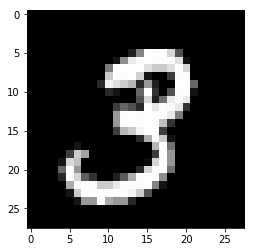

In [19]:
plt.imshow(my_img, cmap="gray")

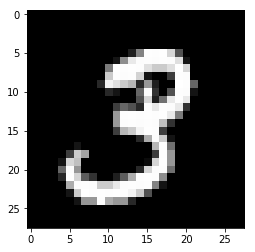

In [18]:
plt.imshow(mnist.train.images[1].reshape(28,28), cmap="gist_gray")

### This data is already normalized for you.

Can you find out how?

Answer:

```python
my_img.min()
my_img.max()
```

In [20]:
mnist.train.images[1].max()

1.0

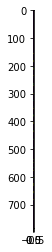

In [21]:
plt.imshow(mnist.train.images[1].reshape(784,1))

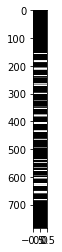

In [22]:
plt.imshow(mnist.train.images[1].reshape(784,1),cmap='gist_gray',aspect=0.02)

- So now that we understand our data again it's just an array of images that are all flattened out and
you could reshape that to visualize it.
- However we won't be reshaping for training purposes.
- We're going to do in the very next lecture is actually create the model.


## Create the Model

So again we're doing a very basic soft Max regression approach.

So I'm going to map out the steps we need to do here.


1. **PLACEHOLDERS**: We need to create our **placeholders** so we'll have our placeholders which essentially going to be X then
2. **VARIABLES**: we also need our **variable's** then 
3. **CREATE GRAPH OPERATIONS**: we're going to need to create the actual **graph operations** then we'll
4. **LOSS FUNCTION**: need to have our Loss function then 
5. **OPTIMIZER**: we'll need our optimizer how we're going to optimize that last function. Essentially what we're going to minimize and 
4. **CREATE & RUN SESSION**: then we'll create our session and run all this.


In [23]:
"""
So our placeholder we only have one set of input 
which is our image data. So I'll say T.F. placeholder
and it's going to be float32 and we're going to indicate
that the shape
is none because it's essentially going to be filled in by
the batch size.
And then 784 because that's 28 times 28 remember we have
flattened arrays.
So thats our placeholder
"""
x = tf.placeholder(tf.float32,shape=[None,784])

In [24]:
"""And then we have our variables which is going to be our weights 
and our bias.
So we'll have our weights here.
And this is going to be T.F. variable.
And then just go ahead and initialize this our weights and biases with zeros.
We already have a discussion of why this is probably not such a great idea.
But right now we want to keep things as simple as possible.
So we'll initiate weights & biases as zeros.
Now typically you probably shouldn't do this but again this is just 
for simplification.

So our weight should be 784 by 10 because we have 784 pixels by 
10 possible labels.
10 because 0-9 possible numbers
"""

W = tf.Variable(tf.zeros([784,10]))

In [25]:
# So that just needs to be the same length as the actual labels.
b = tf.Variable(tf.zeros([10]))

"""So those are variables you can mess around and maybe add 
some random 
numbers here instead of zeros in fact tensor float does 
have its own.
If you take a look at random here it has its own random normal and 
other things of that nature. But again keeping things simple 
We'll do it all zeros.
"""


In [26]:
"""
Create the Graph
Now we need to create our graph operation.
So remember this is what we just basically 
went over in those slides trust.
If we just have a matrix multiplication between X and W 
and then we're going to add to it."""

y = tf.matmul(x,W) + b 

### Loss and Optimizer

Then we need to give our loss function.
So in order to have a loss function we need one more placeholder and that is the y_true values.

Flo 32 and then this is going to be **none** because it's the again the batch size size and then 10 because there's 10 possible labels.

In [27]:
y_true = tf.placeholder(tf.float32,[None,10])

###  Cross Entropy
So we still need to add more for this loss function here.
So we're going to use a cross entropy loss function very common loss function 
to use say cross entropy = then we can basically directly import this from sensor flow we'll say tf.nn.softmax_cross_with_logit()

In [29]:

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2
                               (labels=y_true, logits=y))
# this is basically just tensor flows built in across
# entropy loss function where you're basically passing in.
# You say, these are labels = my true values, where you pass in y
# which will be your actual predictions

So let's create our **optimizer** can zoom back in for this will say that our optimizer= tf.train...
And let's go ahead and just say `learning rates of 0.5` a little bit of a larger learning rate and you can play around that later on.

In [30]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [31]:
# To minimize our loss function
train = optimizer.minimize(cross_entropy)

### Create Session

In [33]:
#Now it's time to create our session remember whenever we're creating 
# a session we need to initialize all the global variables.
# So we'll do the following.
init = tf.global_variables_initializer()

In [36]:
with tf.Session() as sess:
    sess.run(init)
    
    # Train the model for 1000 steps on the training set
    # Using built in batch feeder from mnist for convenience
    
    for step in range(1000):
        """        
        So we'll say for step in range and we'll do 1000 steps on 
        the training set. So if we take a look at MNIST that train 
        the next batch this is the method where you just need to 
        provide then the batch size and it will return a 
        batch of training samples.So we'll say we want 100 for 
        our batch size.
        """
        batch_x , batch_y = mnist.train.next_batch(100) 
        """        
        So this is essentially tuple unpacking packing and 
        if you read the documentation of what this actually returns 
        it just returns a tuple with your X and Y.
        """
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y})
    """
    The final step when you perform in this session is to actually 
    evaluate our model.
    So first we need to figure out where we actually predicted the 
    correct label and 
    we can use tensor Flo's version of argmax to do that.
    Remember arke Max is just a useful function which gives you the
    index position 
    of the highest entry point and with tensor flow it gives you the
    highest entry 
    point of a tensor along some axis. So let's go ahead and show 
    you how to do that.
    And the second argument one is just telling it to do this all 
    on access equal to one.
    
    This is going to return the index position of the label with 
    the highest probability 
    essentially just saying what label it thinks it is 
    and then what we want to do is compare this to the actual true values.
    You pass these in tf.equal()
    One and I want to check where these are equal to so tensor flow 
    has a nice equal function where I can pass these two tensors in 
    and it basically reports back a list of booleans.
    So the result of this correct predictions looks like
    Result would look like [True, False, True...]
    So once again tf.argmax(y,1) outputs the predicted label 
    because of the way we 
    put the one_hot encoding as well as using the softmac regression.
    tf.argmax(y_true,1) = is same, execpt this is the true 
    values/ ground truth labels
    and we check where they are equal to each other seentially outputting
    the list of booleans.
    
    next we need to cast the booleans into floating points 
    [True, False, True...] --> [1, 0, 1, 1,..]
    """    
    # Evaluate Test the Train Model
    prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))
    
    acc = tf.reduce_mean(tf.cast(prediction,tf.float32))
    
    """
    So then we can actually run this.
    So say print the result of a session run and I'm going 
    to run ack because 
    this accuracy is essentially its own graph.
    So that's similar to what we did appear as far as the fighting steps the 
    take except now we're just actually running accuracy.

   And then it needs its own feed dictionary so the feed dictionary
   we're going 
   to feed in this time is the actual test set.
   So we'll say x is equal to just test images. So those 10000 images
   and then 
   we'll say why true is equal to minus test labels. So again 
   pretty convenient 
   that we have those methods and attributes the call but that's what we're doing
   here to evaluate our model.
   We have this correct prediction which just turns the actual 
   predicted labels and 
   true labels into a list of true or false booleans and then we 
   convert that to ones and zeroes.
   Take the mean of that are accuracy. So we're going to run that 
   accuracy in feet in our data.

   Where are the test images and why true is this test labels.
   Now let's run that running this for a thousand steps.
   It looks like we get 91 percent accuracy.
   Now you may be thinking daar That's pretty good.
   A 91 percent accuracy on handwritten digits that only 
   took a few seconds on this computer.
   Not bad.
   Well in fact if you compare this to some of the latest 
   models this actually isn't that great.
   In fact some of the very best models can get over ninety nine
   point seven percent accuracy.
   So what we're going to learn now later on is how we can use convolutional 
   Nero that works to perform much much better than just a high or low 90s.
   We're going to get up to the high 90s.
    """
    
    print(sess.run(acc,feed_dict={x:mnist.test.images,
                                  y_true:mnist.test.labels}))

0.9227


Explaining the last 2 lines as they are pretty useful to understand

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#### PREDICTED

- [3,4] TRUE [3, 9]
- tf.equal says
- [True, False]
- Next step us to cast into 1s and 0s.
-  [1.0, 0.0]
-  acciracy = avg of the two which is 0.5, 50%
 
 **Long explanation**
 
 When we ask for argmaxit just returns back to sort of list of the actual numbers it predicted for
 the classes it says and I think the first 20 examples three in the second one is four.
And then we say well the real values were three and nine. Then when we asked for a tf.equal then the result of that is something like this.
We say true and false because here we can see that they're equal that first one is equal.
The second one however is not equal for is not equal to nine. So then that is a correct prediction.

True false.

The next step after that is to cast that correct prediction into T.F. of that flow essentially casting it to ones and zeroes. So then we get a list that looks like this one point zero and zero point zero then the final step is to reduce the mean essentially take the average of this. And if you take the average of that well that gives you back a single number 0.5 and that number directly relates to the percentage that you got.

Correct.
And that's because these are ones and zeros.
So if we take the average of one and zero.
So 1 divided by two is there a point five which directly results into 50 percent correct and that'sher accuracy.
So just these two lines are doing what are essentially almost like four steps here.


So we compare the predicted the true values we get back a list of matches we convert that list of matches to actual numbers ones and zeros. And because they're ones and zeros it means directly through math. If we take the average of those we get back the percent that we got right. Or the accuracy. So in this really simple example we've got 50 percent right out of two samples inputted compared to there two true labels.

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
 


While this may seem pretty good, we can actually do much better, the best models can get above 99% accuracy.

How do they do this? By using other models, such as convolutional neural networks!